### **Connecting to Google Drive and Importing Libraries**

In [1]:
# Mounting drive to our 'Data_606_Capstone' folder 

from google.colab import drive
drive.mount('/content/drive')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


### **Reading and Previewing Dataframe**

This CSV file contains merged datapoints from 'Business' and 'Review' datasets. We merged and converted file from JSON to CSV so we can modify easily using Pandas. 

In [3]:
# Reading 'Review' dataset in CSV Format 

yelp_biz_review = pd.read_csv("drive/My Drive/DATA_606_Capstone/Datasets/yelp_reviews_food_categories.csv")

In [4]:
yelp_biz_review.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,attributes,categories,review_id,user_id,stars_y,useful,funny,cool,text,date
0,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,1551 N Green St,Brownsburg,IN,46112,39.867338,-86.390529,3.5,112.0,...,"{'NoiseLevel': ""u'average'"", 'BusinessParking'...","Restaurants, Mexican",djujEmxqpY5bmEJ3YaXiBg,jBzITjfkC7M99oN6a5HErQ,4.0,0.0,0.0,0.0,We'd been playing a festival in Western Indian...,2017-09-18 17:29:03
1,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,1551 N Green St,Brownsburg,IN,46112,39.867338,-86.390529,3.5,112.0,...,"{'NoiseLevel': ""u'average'"", 'BusinessParking'...","Restaurants, Mexican",x3LyEt-uiBFCUw65oc0y5g,R9AkporqiO758oEz_g9kxQ,3.0,0.0,0.0,0.0,"The experience happened on Tuesday, July 3rd, ...",2018-07-04 01:02:30
2,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,1551 N Green St,Brownsburg,IN,46112,39.867338,-86.390529,3.5,112.0,...,"{'NoiseLevel': ""u'average'"", 'BusinessParking'...","Restaurants, Mexican",zZcbhKIqxcgjWO8LJUJUaQ,-Z97B_kIy1-w3nifW1PQZg,5.0,0.0,0.0,0.0,Phe-nom-nom-nom-enal! Took my wife here today ...,2016-10-13 02:00:28
3,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,1551 N Green St,Brownsburg,IN,46112,39.867338,-86.390529,3.5,112.0,...,"{'NoiseLevel': ""u'average'"", 'BusinessParking'...","Restaurants, Mexican",ZoN7GbeNGFyPwwKdMEr_Mw,9m9mkjkyo4HGFUWgugewHA,5.0,0.0,0.0,0.0,"Carne Asada tacos were good, hubby had chicken...",2016-07-12 15:05:25
4,2AwhlMOMsYXJvskZKKG2GA,Tequila Sunrise,1551 N Green St,Brownsburg,IN,46112,39.867338,-86.390529,3.5,112.0,...,"{'NoiseLevel': ""u'average'"", 'BusinessParking'...","Restaurants, Mexican",NlQl6Z5UOFmAgSiMo0CbHA,KE2en6iTCiCtqVS9hq50sg,5.0,0.0,0.0,0.0,Delicious food. Very generous portions. Very...,2018-07-03 23:28:02


### **Dataframe Specs**

There are 3,567,667 rows and 19 columns as features such as business_id, review_id, name, and location.

In [5]:
yelp_biz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584010 entries, 0 to 3584009
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars_x       float64
 9   review_count  float64
 10  is_open       float64
 11  attributes    object 
 12  categories    object 
 13  review_id     object 
 14  user_id       object 
 15  stars_y       float64
 16  useful        float64
 17  funny         float64
 18  cool          float64
 19  text          object 
 20  date          object 
dtypes: float64(9), object(12)
memory usage: 574.2+ MB


In [6]:
#Checking for null values

yelp_biz_review.isna().sum()

business_id         0
name                1
address         10783
city                2
state               2
postal_code        38
latitude            2
longitude           2
stars_x             2
review_count        2
is_open             2
attributes       6192
categories          2
review_id           2
user_id             2
stars_y             2
useful              2
funny               2
cool                2
text                2
date                3
dtype: int64

In [7]:
yelp_biz_review = yelp_biz_review.drop(['user_id'], axis=1)
yelp_biz_review = yelp_biz_review.drop(['stars_y'], axis=1)

In [8]:
# Dropping null values

yelp_biz_review = yelp_biz_review.dropna()
yelp_biz_review.isna().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
attributes      0
categories      0
review_id       0
useful          0
funny           0
cool            0
text            0
date            0
dtype: int64

In [9]:
# Changing datatype for 'review_count' column to int64 from float64

yelp_biz_review["review_count"] = yelp_biz_review['review_count'].astype('int64')

In [10]:
# computing number of rows 
rows = len(yelp_biz_review.axes[0])

# computing number of columns
cols = len(yelp_biz_review.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  3567667
Number of Columns:  19


### **Exploratory Data Analysis**

* There are 26,418 unique businesses
* There are 876 unique cities

In [14]:
#There are 26,418 unique businesses in the dataset after merging

yelp_biz_review['name'].nunique()

26418

In [15]:
yelp_biz_review['city'].nunique()

876

##### Distribution of Categories 

In [16]:
categories = yelp_biz_review['categories'].dropna()
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

biz_categories = to_1D(categories.str.split(","))

In [22]:
biz_categories.value_counts()[:10]

Restaurants               3224151
Food                      1230614
Nightlife                 1042610
Bars                      1006588
American (Traditional)     718148
American (New)             656184
Breakfast & Brunch         598450
Sandwiches                 493642
Seafood                    459815
Pizza                      334440
dtype: int64

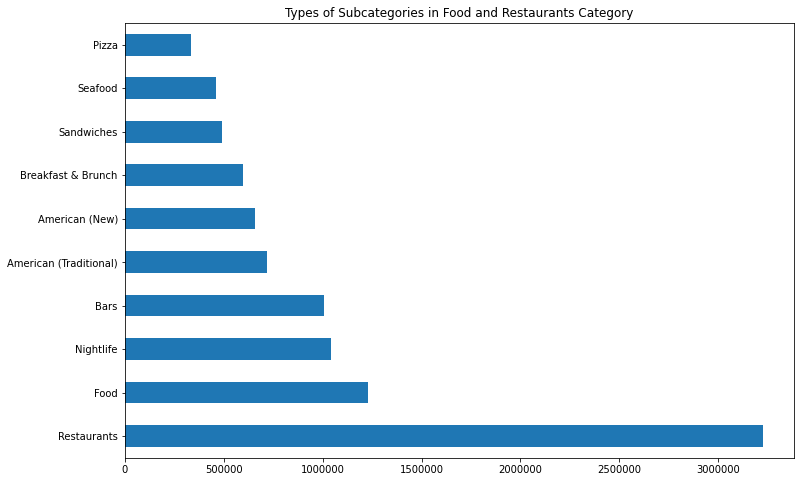

In [18]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')


ax = biz_categories.value_counts()[:10].plot(kind='barh');


plt.title('Types of Subcategories in Food and Restaurants Category');

##### Top 10 Popular Cities and States

* Top Cities

In [37]:
review_by_city = yelp_biz_review['city'].value_counts()[:10]
review_by_city

Philadelphia     471688
New Orleans      372529
Nashville        251419
Tampa            230796
Tucson           191474
Indianapolis     183217
Reno             154458
Santa Barbara    130064
Saint Louis      121726
Boise             56813
Name: city, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


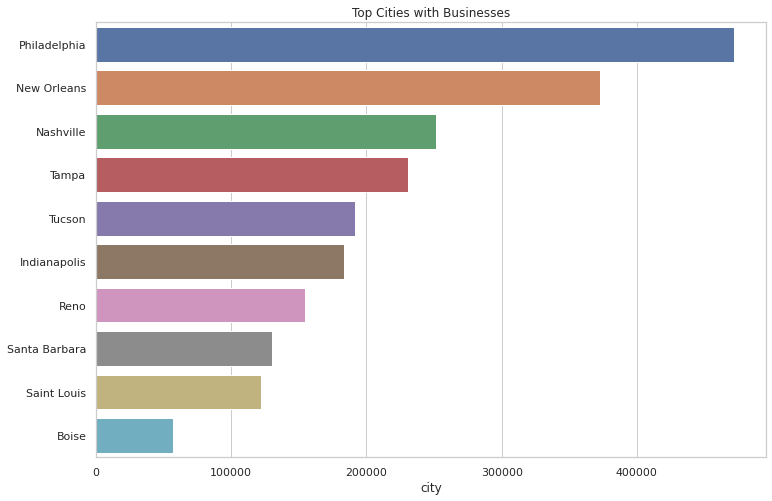

In [34]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")

cnt = yelp_biz_review['city'].value_counts()[:10].to_frame()

sns.barplot(cnt['city'], cnt.index)

plt.title('Top Cities with Businesses');

* Top States

In [49]:
review_by_state = yelp_biz_review['state'].value_counts()[:10]
review_by_state

PA    778551
FL    613868
LA    433374
TN    333633
MO    254161
IN    251834
AZ    205485
NV    191230
CA    165801
NJ    134027
Name: state, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


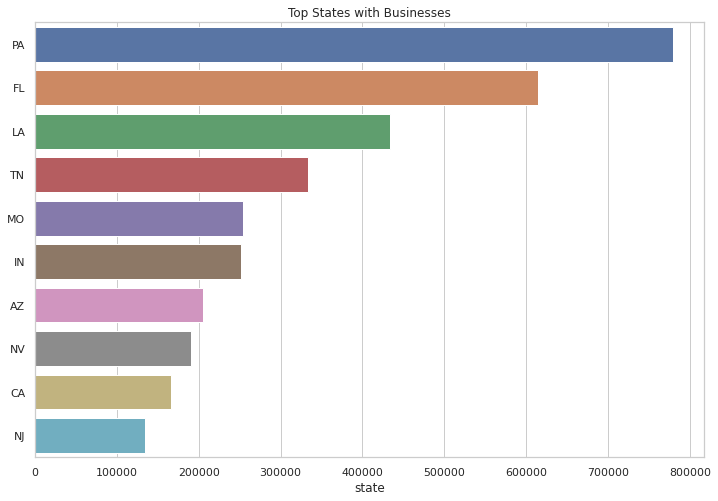

In [52]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")

cnt = yelp_biz_review['state'].value_counts()[:10].to_frame()

sns.barplot(cnt['state'], cnt.index)

plt.title('Top States with Businesses');

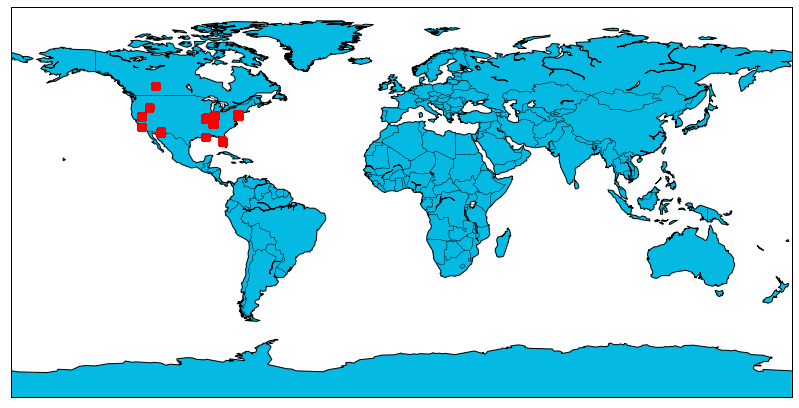

In [19]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
           lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(yelp_biz_review['latitude'].tolist(),
         yelp_biz_review['longitude'].tolist())

m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

##### Distribution of Rating

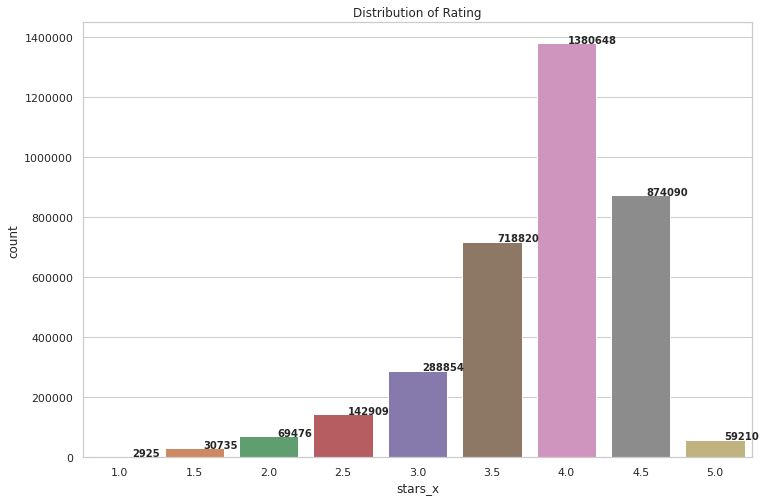

In [43]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")

ax = sns.countplot(x=yelp_biz_review["stars_x"])

#to add numbers on top of the bars
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.05, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='small') 
                

plt.title('Distribution of Rating');

##### Review Count

In [43]:
# Average review count is 537 per business.

yelp_biz_review['review_count'].mean()

537.2766581073851

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


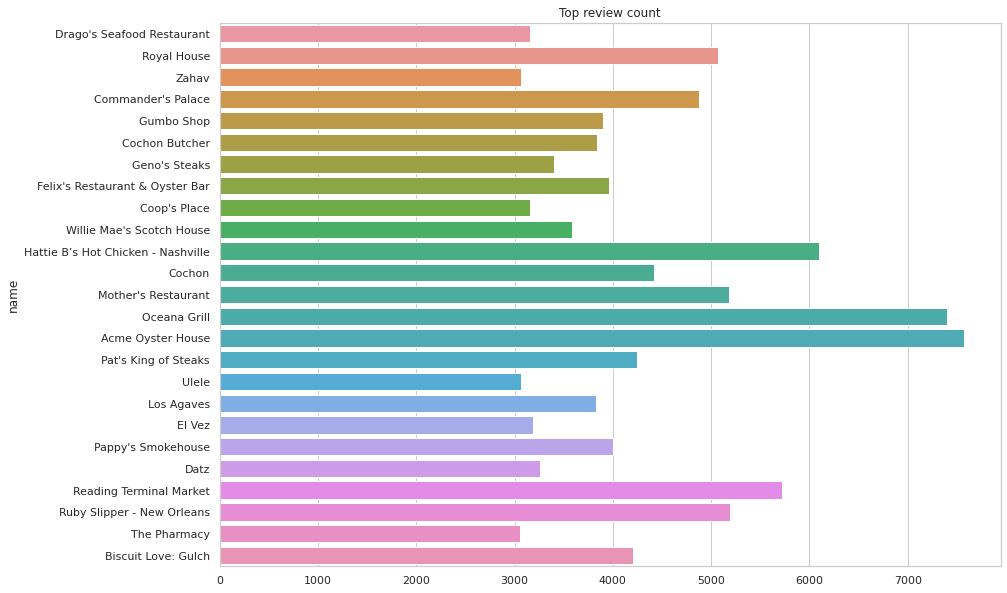

In [46]:
plt.figure(figsize = (14,10))
sns.set_theme(style="whitegrid")

sns.barplot(yelp_biz_review[yelp_biz_review['review_count'] >3000]['review_count'],
            yelp_biz_review[yelp_biz_review['review_count'] >3000]['name'])


plt.xlabel('')
plt.title('Top review count');